In [2]:
import os
import sys
import csv
import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [18]:
def get_data(type,device,dataA,dataB):
    # type = "64_DWConv_kernel"
    data_root = "../paper/{}/data".format(type)
    # device_list= ["mi11_cpu","redmi_gpu","mate30e_npu"]
    # device = "mate30e_npu"
    txt = open('{}/{}.txt'.format(data_root,device), 'r')

    latency = txt.readlines()
    latency = [i.strip() for i in latency]

    info, data = latency[:3], latency[3:]
    latency_dict = {}
    for i in data:
        tmp = i.split(" ")
        (filepath, filename) = os.path.split(tmp[0])
        (name, suffix) = os.path.splitext(filename)
        latency_dict[name] = [float(tmp[1]),float(tmp[2]),float(tmp[3])]
    read_csv   = '{}/{}.csv'.format(data_root,type)
    # write_csv = 'dw_{}_{}_{}.csv'.format("kernel",device,"core0")
    write_csv  = '{}/dw_kernel_{}.csv'.format(data_root,device)
    read_file  = open(read_csv,"r", encoding='utf-8')
    write_file = open(write_csv,"w+", encoding='utf-8')
    reader = csv.reader(read_file)
    writer = csv.writer(write_file)
    title = ["op","H","in_c","out_c","stride","kernel_size","FLOPs","Params","MACs", 'intensity','load_time', 'first_time', 'avg_time','FLOPS','bandwidth']
    writer.writerow(title)
    for row in reader:
        if row[0] == "op":
            continue
        name = "{}_{}".format("TestNet_k", row[5])
        print(name)
        # if name in latency_dict.keys():
        load_time  = latency_dict[name][0]
        first_time = latency_dict[name][1]
        avg_time   = latency_dict[name][2]
        # intensity = float(row[6]) / float(row[8])
        # intensity = float(row[9])
        FLOPS = float(row[6]) / (avg_time/1000) / 1024
        bandwidth = float(row[8]) / (avg_time/1000)
        tmp = copy.deepcopy(row)
        tmp.append(load_time)
        tmp.append(first_time)
        tmp.append(avg_time)
        # tmp.append(intensity)
        tmp.append(FLOPS)
        tmp.append(bandwidth)
        writer.writerow(tmp)
    write_file.close()
    def get_col(data,label):
        x = data[label]
        y = [i for i in x]
        return y


    read_file = open(write_csv,"r", encoding='utf-8')
    data = pd.read_csv(read_file)

    # first_time = get_col(data, 'first_time')
    # # print(first_time)
    # load_time = get_col(data, 'load_time')
    # avg_time = get_col(data, 'avg_time')
    # flops = get_col(data, 'FLOPs')
    # params = get_col(data, 'Params')
    # macs = get_col(data, 'MACs')
    # channel = get_col(data, 'in_c')
    # kernel = get_col(data, 'kernel_size')
    # # total_size = [float(i)/1024 /1024 for i in total_size]
    # intensity = []
    # FLOPS = []
    # bandwidth = []
    # comp = []
    # for i in range(len(first_time)):
    #     intensity.append(float(flops[i])/float(macs[i]))
    #     FLOPS.append(float(flops[i])/float(avg_time[i]))
    #     bandwidth.append(float(macs[i])/float(avg_time[i]))
        # comp.append(float(first_time[i])/avg_time[i])
    
    dataA = get_col(data, dataA)
    dataB = get_col(data, dataB)
    
    return dataA,dataB

TestNet_k_1
TestNet_k_3
TestNet_k_5
TestNet_k_7
TestNet_k_9
TestNet_k_11
TestNet_k_13
TestNet_k_15
TestNet_k_17
TestNet_k_19
TestNet_k_21
TestNet_k_23
[1.7745632178783437, 4.07339067148801, 5.876980583349865, 9.8486858583157, 10.333809798087744, 12.468140803958995, 14.667007820675597, 16.179778730960372, 18.26337966746072, 19.412972074069696, 20.738008486644443, 20.184904899421813]


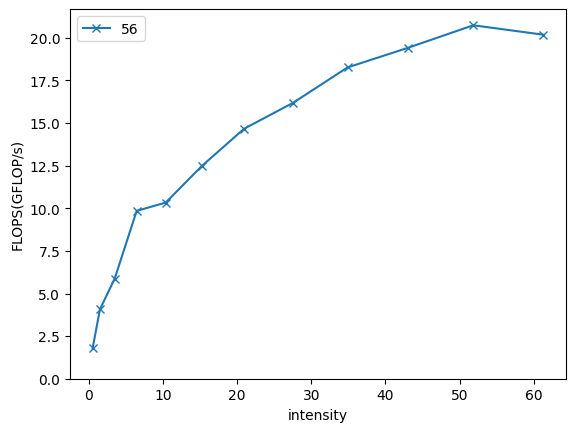

In [23]:
# kernel,latency = get_data("112_DWConv_kernel","mate30e_npu","kernel_size","avg_time")

# # plt.xscale("log")
# # z1 = np.polyfit(intensity, Flops, 3)
# # p1 = np.poly1d(z1)
# # # plt.ylim(0,3)
# # yval = p1(intensity)
# # plt.plot(intensity, yval, 'r',label='polyfit values')
# plt.plot(kernel,latency,marker="x",label="112x112")
# input = "112"
# kernel,latency = get_data("{}_DWConv_kernel".format(input),"mi11_cpu","kernel_size","FLOPS")
# plt.plot(kernel,latency,marker="x",label="CPU")
# kernel,latency = get_data("{}_DWConv_kernel".format(input),"redmi_gpu","kernel_size","FLOPS")
# plt.plot(kernel,latency,marker="x",label="GPU")
# kernel,latency = get_data("{}_DWConv_kernel".format(input),"mate30e_npu","kernel_size","FLOPS")
# plt.plot(kernel,latency,marker="x",label="NPU")
device = "mate30e_gpu"
kernel,latency = get_data("test_dwconv_kernel_56"
                          ,device,"intensity","FLOPS")
print(latency)
plt.plot(kernel,latency,marker="x",label="56")
plt.xlabel("intensity")
plt.ylabel("FLOPS(GFLOP/s)")

kernel,latency = get_data("test_dwconv_kernel_28"
                          ,device,"intensity","FLOPS")
print(latency)
plt.plot(kernel,latency,marker="x",label="28")
plt.xlabel("intensity")
plt.ylabel("FLOPS(GFLOP/s)")

plt.ylim(ymin=0)
plt.legend()
# name = "{}_DWConv_Roofline".format(device)
# plt.savefig("/home/hujie/Desktop/fig/{}.png".format(name),dpi=300)

In [ ]:
device = "mate30e_cpu"
kernel,latency = get_data("{}_DWConv_kernel".format(112),device,"intensity","FLOPS")
plt.plot(kernel,latency,marker="x",label="112x112")
